In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [44]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_labels_df.pkl"))

In [45]:
features_df.head()

Gaze_Counts_In_RoI_Pre  Gaze_Counts_In_RoI_Post  Gaze_Counts_Out_RoI_Pre  \
0                       0                      315                     3902   
1                     278                      868                     3922   
2                       0                     1808                     4329   
3                    2800                     2293                     1658   
4                     227                        4                     2691   

   Gaze_Counts_Out_RoI_Post  Gaze_In\out_RoI_Ratio_Pre  \
0                      1599                   0.000000   
1                      1584                   0.070882   
2                      1088                   0.000000   
3                         0                   1.688782   
4                      1564                   0.084355   

   Gaze_In\out_RoI_Ratio_Post  Gaze_Re_Entries_To_RoI_Count_Pre  \
0                    0.196998                                 0   
1                    0.547980                                 6   
2                    1.661765                                 0   
3                 2293.000000                                12   
4                    0.002558                                 8   

   Gaze_Re_Entries_To_RoI_Count_Post  Gaze_Re_Entries_To_RoI_Rate_Pre  \
0                                  4                         0.000000   
1                                 24                         0.702494   
2                                  1                         0.000000   
3                                  0                         1.309186   
4                                  1                         1.324284   

   Gaze_Re_Entries_To_RoI_Rate_Post  ...  DVA_Max_Gaze_Post  \
0                          1.156627  ...          18.722307   
1                          5.999000  ...          21.987232   
2                          0.208667  ...          11.362046   
3                          0.000000  ...           3.272221   
4                          0.428449  ...          17.549601   

   DVA_Min_Gaze_Post  DVA_Mean_Fixations_Pre  DVA_Std_Fixations_Pre  \
0           0.678962               19.252270               4.306955   
1           0.275379               12.319736               5.345038   
2           2.015727               12.982817               2.999147   
3           0.117117                5.557261               3.937523   
4           1.622195                9.706162               3.309963   

   DVA_Max_Fixations_Pre  DVA_Min_Fixations_Pre  DVA_Mean_Fixations_Post  \
0              24.290965              10.236542                 4.975633   
1              19.855257               1.103654                 7.285351   
2              17.015070               6.246335                 5.997195   
3              18.028127               1.757268                 1.517561   
4              16.002109               5.193516                13.609037   

   DVA_Std_Fixations_Post  DVA_Max_Fixations_Post  DVA_Min_Fixations_Post  
0                2.437215                8.568763                1.000737  
1                7.138233               21.770775                1.637440  
2                3.438549               10.903174                2.777841  
3                0.856358                2.865752                0.538769  
4                2.415350               17.293761                9.647457  

[5 rows x 116 columns]

In [46]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Columns: 116 entries, Gaze_Counts_In_RoI_Pre to DVA_Min_Fixations_Post
dtypes: float64(107), int32(9)
memory usage: 1.1 MB


In [47]:
labels_df.head()

Session
series_id         
0                1
1                1
2                1
3                1
4                0

In [48]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1245
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Session  1246 non-null   int32
dtypes: int32(1)
memory usage: 14.6 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [49]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            310
Pupil radius_Fixations_First_Diff_Post           310
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     310
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    310
onset_Mean_Saccades_Start_In_RoI_Post            240
Duration_Max_Saccades_Start_In_RoI_Post          240
onset_Std_Saccades_Start_In_RoI_Post             240
peak_velocity_Min_Saccades_Start_In_RoI_Post     240
vis_angle_Min_Saccades_Start_In_RoI_Post         240
Duration_Min_Saccades_Start_In_RoI_Post          240
dtype: int64

Remove columns with more than 30% missing values

In [50]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.3 * features_df.shape[0]]

In [51]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            310
Pupil radius_Fixations_First_Diff_Post           310
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     310
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    310
onset_Mean_Saccades_Start_In_RoI_Post            240
Duration_Max_Saccades_Start_In_RoI_Post          240
onset_Std_Saccades_Start_In_RoI_Post             240
peak_velocity_Min_Saccades_Start_In_RoI_Post     240
vis_angle_Min_Saccades_Start_In_RoI_Post         240
Duration_Min_Saccades_Start_In_RoI_Post          240
dtype: int64

how many missing values are there in each row? show the top 10

In [52]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

335     72
827     69
312     69
8       69
1007    68
137     68
999     68
784     68
331     68
142     68
dtype: int64

Remove rows with more than 30% missing values

In [53]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.3 * features_df.shape[1], :]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [54]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

688    32
348    32
5      32
259    32
874    28
679    28
833    28
921    28
614    25
364    25
dtype: int64

Train/Test Split (before any preprocessing is done)

In [55]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly
random = np.random
random.seed(1)
random.shuffle(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

In [56]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df,
#                                                     random_state=420,
#                                                     test_size=0.2)

In [57]:
X_train.head()

Gaze_Counts_In_RoI_Pre  Gaze_Counts_In_RoI_Post  Gaze_Counts_Out_RoI_Pre  \
0                       0                      315                     3902   
1                     278                      868                     3922   
2                       0                     1808                     4329   
3                    2800                     2293                     1658   
4                     227                        4                     2691   

   Gaze_Counts_Out_RoI_Post  Gaze_In\out_RoI_Ratio_Pre  \
0                      1599                   0.000000   
1                      1584                   0.070882   
2                      1088                   0.000000   
3                         0                   1.688782   
4                      1564                   0.084355   

   Gaze_In\out_RoI_Ratio_Post  Gaze_Re_Entries_To_RoI_Count_Pre  \
0                    0.196998                                 0   
1                    0.547980                                 6   
2                    1.661765                                 0   
3                 2293.000000                                12   
4                    0.002558                                 8   

   Gaze_Re_Entries_To_RoI_Count_Post  Gaze_Re_Entries_To_RoI_Rate_Pre  \
0                                  4                         0.000000   
1                                 24                         0.702494   
2                                  1                         0.000000   
3                                  0                         1.309186   
4                                  1                         1.324284   

   Gaze_Re_Entries_To_RoI_Rate_Post  ...  DVA_Max_Gaze_Post  \
0                          1.156627  ...          18.722307   
1                          5.999000  ...          21.987232   
2                          0.208667  ...          11.362046   
3                          0.000000  ...           3.272221   
4                          0.428449  ...          17.549601   

   DVA_Min_Gaze_Post  DVA_Mean_Fixations_Pre  DVA_Std_Fixations_Pre  \
0           0.678962               19.252270               4.306955   
1           0.275379               12.319736               5.345038   
2           2.015727               12.982817               2.999147   
3           0.117117                5.557261               3.937523   
4           1.622195                9.706162               3.309963   

   DVA_Max_Fixations_Pre  DVA_Min_Fixations_Pre  DVA_Mean_Fixations_Post  \
0              24.290965              10.236542                 4.975633   
1              19.855257               1.103654                 7.285351   
2              17.015070               6.246335                 5.997195   
3              18.028127               1.757268                 1.517561   
4              16.002109               5.193516                13.609037   

   DVA_Std_Fixations_Post  DVA_Max_Fixations_Post  DVA_Min_Fixations_Post  
0                2.437215                8.568763                1.000737  
1                7.138233               21.770775                1.637440  
2                3.438549               10.903174                2.777841  
3                0.856358                2.865752                0.538769  
4                2.415350               17.293761                9.647457  

[5 rows x 116 columns]

Fill missing values with the mean of the column

In [58]:
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

Balancing the dataset

In [59]:
y_train.value_counts()

Session
1          466
0          440
dtype: int64

Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

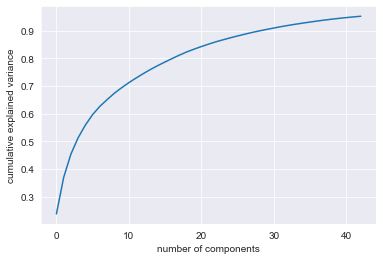

In [61]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [62]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [63]:
X_train_pca

array([[-3.45754882, -3.71666136,  1.47294812, ...,  1.09828029,
        -1.53729799,  0.39904323],
       [ 4.42863145, -2.69473851, -6.98740751, ..., -0.17158436,
         0.4952136 ,  0.09888962],
       [-2.2392131 , -4.80413441,  2.79816194, ..., -0.03069061,
         0.14248141, -0.12927976],
       ...,
       [-4.60740304, -2.35221134,  0.7018763 , ..., -0.24661443,
        -0.12099135,  0.01647514],
       [ 8.20675385, -3.02847975,  0.31194318, ..., -0.75565166,
         0.21204021, -0.91847691],
       [-6.10155711,  0.61175352, -0.5660286 , ..., -0.01093834,
         0.17647383,  0.02882784]])

LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

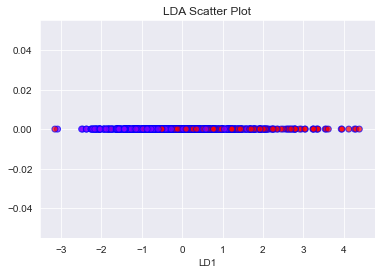

In [65]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [66]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [69]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 0.9, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.8364285714285714, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.53
Precision: 0.57
Recall: 0.39
F1-score: 0.46
ROC-AUC score: 0.53


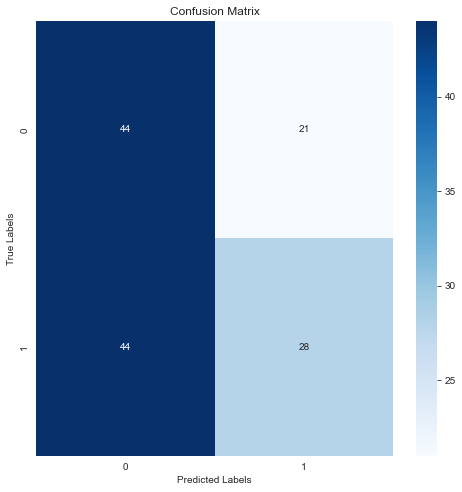

In [70]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.11888888888888888, 'max_depth': 2, 'n_estimators': 115}

Gradient Boosting (test data)
Accuracy: 0.53
Precision: 0.56
Recall: 0.43
F1-score: 0.49
ROC-AUC score: 0.53


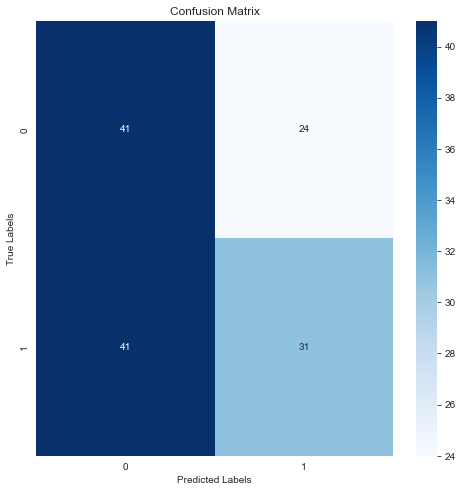

In [72]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 120, 15)
MAX_DEPTH = range(2, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 80}

Random Forest (test data)
Accuracy: 0.52
Precision: 0.57
Recall: 0.35
F1-score: 0.43
ROC-AUC score: 0.53


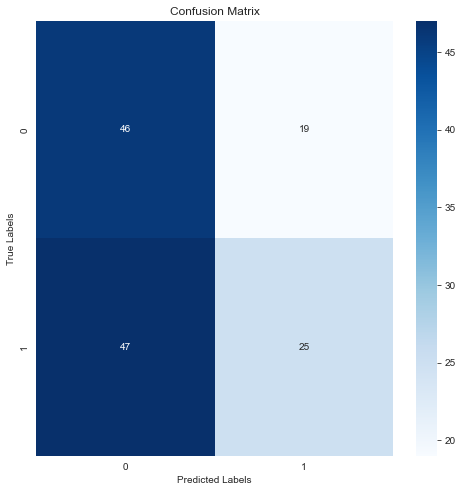

In [74]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [75]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 4)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.15000000000000002, 'max_depth': 1, 'n_estimators': 100}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.51
Precision: 0.55
Recall: 0.4
F1-score: 0.46
ROC-AUC score: 0.52


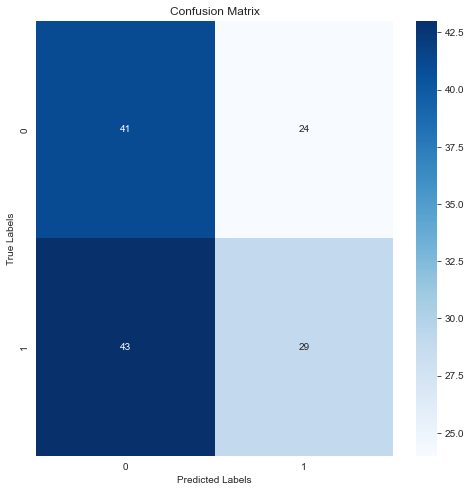

In [76]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [77]:
!pip install pytorch-tabnet
!pip install optuna

In [78]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [79]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 15),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet_classifier = TabNetClassifier(**best_params)
tabnet_classifier.fit(X_train_np, y_train)
best_params

[I 2023-06-11 15:50:32,574] A new study created in memory with name: no-name-676e256e-b2be-4986-9d88-29618979dffe



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43547


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:35,729] Trial 0 finished with value: 0.4354700854700855 and parameters: {'n_d': 57, 'n_a': 57, 'n_steps': 13, 'gamma': 1.342051866302007, 'n_independent': 9, 'n_shared': 7, 'lambda_sparse': 0.08063258987244723}. Best is trial 0 with value: 0.4354700854700855.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51325


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:36,960] Trial 1 finished with value: 0.5132478632478632 and parameters: {'n_d': 10, 'n_a': 33, 'n_steps': 15, 'gamma': 0.2454410706432601, 'n_independent': 7, 'n_shared': 4, 'lambda_sparse': 0.006492744667062403}. Best is trial 1 with value: 0.5132478632478632.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49145


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:37,841] Trial 2 finished with value: 0.4914529914529915 and parameters: {'n_d': 35, 'n_a': 59, 'n_steps': 7, 'gamma': 1.3387091043435584, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.07181349443518893}. Best is trial 1 with value: 0.5132478632478632.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53579


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:39,779] Trial 3 finished with value: 0.5357905982905983 and parameters: {'n_d': 54, 'n_a': 43, 'n_steps': 11, 'gamma': 1.6754164978974686, 'n_independent': 4, 'n_shared': 10, 'lambda_sparse': 0.0072398699583216975}. Best is trial 3 with value: 0.5357905982905983.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:40,559] Trial 4 finished with value: 0.4634615384615385 and parameters: {'n_d': 45, 'n_a': 12, 'n_steps': 7, 'gamma': 1.010399412276046, 'n_independent': 2, 'n_shared': 10, 'lambda_sparse': 0.09781318949313782}. Best is trial 3 with value: 0.5357905982905983.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46346

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50363


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:41,467] Trial 5 finished with value: 0.5036324786324786 and parameters: {'n_d': 45, 'n_a': 58, 'n_steps': 11, 'gamma': 1.202746714334927, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.08811632934082113}. Best is trial 3 with value: 0.5357905982905983.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:42,446] Trial 6 finished with value: 0.55 and parameters: {'n_d': 10, 'n_a': 62, 'n_steps': 5, 'gamma': 0.7091774185944018, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.06099589025587579}. Best is trial 6 with value: 0.55.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:42,893] Trial 7 finished with value: 0.5525641025641025 and parameters: {'n_d': 17, 'n_a': 29, 'n_steps': 12, 'gamma': 1.9196455224726037, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.00461705984287882}. Best is trial 7 with value: 0.5525641025641025.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55256

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.5


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:44,304] Trial 8 finished with value: 0.5 and parameters: {'n_d': 17, 'n_a': 38, 'n_steps': 9, 'gamma': 1.3310928170338532, 'n_independent': 8, 'n_shared': 7, 'lambda_sparse': 0.06829972079865367}. Best is trial 7 with value: 0.5525641025641025.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:44,498] Trial 9 finished with value: 0.5098290598290598 and parameters: {'n_d': 50, 'n_a': 22, 'n_steps': 4, 'gamma': 0.17094368336710533, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.0972842791017165}. Best is trial 7 with value: 0.5525641025641025.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are au


Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50983

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47447


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:45,141] Trial 11 finished with value: 0.47275641025641024 and parameters: {'n_d': 23, 'n_a': 47, 'n_steps': 4, 'gamma': 0.739814391579269, 'n_independent': 6, 'n_shared': 4, 'lambda_sparse': 0.04719214280060652}. Best is trial 7 with value: 0.5525641025641025.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47276


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:45,891] Trial 12 finished with value: 0.4818376068376069 and parameters: {'n_d': 8, 'n_a': 28, 'n_steps': 4, 'gamma': 0.7132694696685598, 'n_independent': 10, 'n_shared': 9, 'lambda_sparse': 0.05348834225940871}. Best is trial 7 with value: 0.5525641025641025.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48184


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:46,404] Trial 13 finished with value: 0.4891025641025641 and parameters: {'n_d': 29, 'n_a': 8, 'n_steps': 9, 'gamma': 1.9468151932507505, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.023700426449571745}. Best is trial 7 with value: 0.5525641025641025.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4891

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52927


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:48,113] Trial 14 finished with value: 0.5292735042735043 and parameters: {'n_d': 17, 'n_a': 51, 'n_steps': 15, 'gamma': 1.635932717377052, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.00022382096711823837}. Best is trial 7 with value: 0.5525641025641025.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:48,298] Trial 15 finished with value: 0.583440170940171 and parameters: {'n_d': 15, 'n_a': 17, 'n_steps': 1, 'gamma': 0.8960584650522075, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.04566631544983894}. Best is trial 15 with value: 0.583440170940171.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.58344


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:48,539] Trial 16 finished with value: 0.5026709401709402 and parameters: {'n_d': 33, 'n_a': 17, 'n_steps': 2, 'gamma': 1.6406508020431496, 'n_independent': 2, 'n_shared': 8, 'lambda_sparse': 0.04427561542719737}. Best is trial 15 with value: 0.583440170940171.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50267


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:49,427] Trial 17 finished with value: 0.5049145299145299 and parameters: {'n_d': 18, 'n_a': 31, 'n_steps': 12, 'gamma': 0.97063423331623, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.032749347986226654}. Best is trial 15 with value: 0.583440170940171.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.50491


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:49,839] Trial 18 finished with value: 0.6012820512820513 and parameters: {'n_d': 63, 'n_a': 18, 'n_steps': 9, 'gamma': 0.3895857282453927, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.018154440379022217}. Best is trial 18 with value: 0.6012820512820513.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.60128


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:50,541] Trial 19 finished with value: 0.5228632478632479 and parameters: {'n_d': 64, 'n_a': 17, 'n_steps': 6, 'gamma': 0.43018830431164534, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.01847041426814776}. Best is trial 18 with value: 0.6012820512820513.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52286


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:51,203] Trial 20 finished with value: 0.4757478632478632 and parameters: {'n_d': 61, 'n_a': 16, 'n_steps': 9, 'gamma': 0.5016874051889489, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.03547398296552428}. Best is trial 18 with value: 0.6012820512820513.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47575


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:51,675] Trial 21 finished with value: 0.4685897435897436 and parameters: {'n_d': 40, 'n_a': 25, 'n_steps': 10, 'gamma': 0.9200448421661466, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.016639600980831157}. Best is trial 18 with value: 0.6012820512820513.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46859


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:52,232] Trial 22 finished with value: 0.4938034188034188 and parameters: {'n_d': 22, 'n_a': 19, 'n_steps': 13, 'gamma': 0.4286569700373193, 'n_independent': 1, 'n_shared': 2, 'lambda_sparse': 0.020318081355836667}. Best is trial 18 with value: 0.6012820512820513.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.4938


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:52,843] Trial 23 finished with value: 0.6202991452991453 and parameters: {'n_d': 15, 'n_a': 10, 'n_steps': 13, 'gamma': 0.8042999081770958, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.01095555972340101}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.6203


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:53,266] Trial 24 finished with value: 0.5321581196581197 and parameters: {'n_d': 29, 'n_a': 11, 'n_steps': 8, 'gamma': 0.5682470855467111, 'n_independent': 2, 'n_shared': 3, 'lambda_sparse': 0.038295957982585054}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.53216


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:53,455] Trial 25 finished with value: 0.593482905982906 and parameters: {'n_d': 12, 'n_a': 8, 'n_steps': 2, 'gamma': 0.301516239450473, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.012626525843574822}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.59348

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.45118


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:54,401] Trial 26 finished with value: 0.4511752136752137 and parameters: {'n_d': 40, 'n_a': 8, 'n_steps': 14, 'gamma': 0.28898673120111623, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.013187854569619807}. Best is trial 23 with value: 0.6202991452991453.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:54,659] Trial 27 finished with value: 0.5599358974358974 and parameters: {'n_d': 12, 'n_a': 13, 'n_steps': 3, 'gamma': 0.16409349391206407, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.026197797037797604}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.55994


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:55,028] Trial 28 finished with value: 0.4329059829059829 and parameters: {'n_d': 26, 'n_a': 8, 'n_steps': 7, 'gamma': 0.33449362977599656, 'n_independent': 3, 'n_shared': 2, 'lambda_sparse': 0.012630583459972772}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.43291

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.48184


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:55,904] Trial 29 finished with value: 0.4818376068376068 and parameters: {'n_d': 51, 'n_a': 20, 'n_steps': 13, 'gamma': 0.1211855143251929, 'n_independent': 5, 'n_shared': 1, 'lambda_sparse': 0.024658630769869586}. Best is trial 23 with value: 0.6202991452991453.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:56,533] Trial 30 finished with value: 0.4768162393162393 and parameters: {'n_d': 20, 'n_a': 13, 'n_steps': 10, 'gamma': 0.5878620760780745, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.011830802378174514}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47682


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:56,735] Trial 31 finished with value: 0.5854700854700855 and parameters: {'n_d': 15, 'n_a': 15, 'n_steps': 1, 'gamma': 0.3509895279686641, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.02802659687631498}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.58547


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:57,016] Trial 32 finished with value: 0.5826923076923076 and parameters: {'n_d': 14, 'n_a': 13, 'n_steps': 2, 'gamma': 0.3275016375752959, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.019212962335252545}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.58269


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:57,293] Trial 33 finished with value: 0.5257478632478633 and parameters: {'n_d': 12, 'n_a': 34, 'n_steps': 2, 'gamma': 0.24900469285217725, 'n_independent': 4, 'n_shared': 6, 'lambda_sparse': 0.007941121125174413}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52575


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:57,547] Trial 34 finished with value: 0.4741452991452991 and parameters: {'n_d': 59, 'n_a': 11, 'n_steps': 3, 'gamma': 0.3837090004286447, 'n_independent': 1, 'n_shared': 5, 'lambda_sparse': 0.026719541862774462}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.47415


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:57,865] Trial 35 finished with value: 0.4675213675213675 and parameters: {'n_d': 8, 'n_a': 22, 'n_steps': 5, 'gamma': 0.10113728853618265, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.004664643290685065}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.46752

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.41058


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:58,067] Trial 36 finished with value: 0.41057692307692306 and parameters: {'n_d': 30, 'n_a': 14, 'n_steps': 1, 'gamma': 0.5114813354272854, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.014251888179277885}. Best is trial 23 with value: 0.6202991452991453.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:50:58,670] Trial 37 finished with value: 0.5123931623931625 and parameters: {'n_d': 21, 'n_a': 10, 'n_steps': 6, 'gamma': 0.2514550426684102, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.022095128938599273}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.51239

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.49177


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:51:00,055] Trial 38 finished with value: 0.49177350427350425 and parameters: {'n_d': 13, 'n_a': 39, 'n_steps': 15, 'gamma': 0.6191214935467941, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.028756234441027186}. Best is trial 23 with value: 0.6202991452991453.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.40791


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:51:00,914] Trial 39 finished with value: 0.4079059829059829 and parameters: {'n_d': 37, 'n_a': 27, 'n_steps': 11, 'gamma': 0.4313871593683426, 'n_independent': 5, 'n_shared': 2, 'lambda_sparse': 0.009770353498067055}. Best is trial 23 with value: 0.6202991452991453.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 15:51:01,084] Trial 40 finished with value: 0.6318376068376069 and parameters: {'n_d': 47, 'n_a': 20, 'n_steps': 3, 'gamma': 0.8103707547450896, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.015974922817438498}. Best is trial 40 with value: 0.6318376068376069.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights 


Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.63184

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.52543
epoch 0  | loss: 0.0     |  0:00:00s
epoch 1  | loss: 0.0     |  0:00:00s
epoch 2  | loss: 0.0     |  0:00:00s
epoch 3  | loss: 0.0     |  0:00:00s
epoch 4  | loss: 0.0     |  0:00:00s
epoch 5  | loss: 0.0     |  0:00:00s
epoch 6  | loss: 0.0     |  0:00:00s
epoch 7  | loss: 0.0     |  0:00:00s
epoch 8  | loss: 0.0     |  0:00:00s
epoch 9  | loss: 0.0     |  0:00:00s
epoch 10 | loss: 0.0     |  0:00:00s
epoch 11 | loss: 0.0     |  0:00:00s
epoch 12 | loss: 0.0     |  0:00:00s
epoch 13 | loss: 0.0     |  0:00:00s
epoch 14 | loss: 0.0     |  0:00:00s
epoch 15 | loss: 0.0     |  0:00:00s
epoch 16 | loss: 0.0     |  0:00:00s
epoch 17 | loss: 0.0     |  0:00:00s
epoch 18 | loss: 0.0     |  0:00:00s
epoch 19 | loss: 0.0     |  0:00:00s
epoch 20 | loss: 0.0     |  0:00:00s
epoch 21 | loss: 0.0     |  0:00:00s
epoch 22 | los

C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


{'n_d': 47,
 'n_a': 20,
 'n_steps': 3,
 'gamma': 0.8103707547450896,
 'n_independent': 1,
 'n_shared': 1,
 'lambda_sparse': 0.015974922817438498}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.53
Precision: 0.53
Recall: 1.0
F1-score: 0.69
ROC-AUC score: 0.5


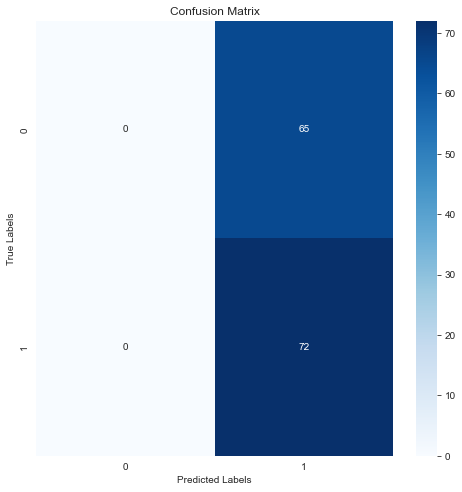

In [80]:
# Evaluate final model on test set
y_test_pred = tabnet_classifier.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [81]:
the_best_model_ever = gb_best_estimator

Feature importance

In [82]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
onset_Fixations_First_In_RoI_Post          0.140308
Gaze_In\out_RoI_Ratio_Pre                  0.123433
last_onset_Max_Saccades_End_In_RoI_Pre     0.052674
Duration_Max_Saccades_Start_In_RoI_Post    0.043160
DVA_Std_Gaze_Pre                           0.042027
...                                             ...
onset_Max_Saccades_Start_In_RoI_Pre        0.000000
onset_Mean_Saccades_Start_In_RoI_Post      0.000000
onset_Min_Saccades_Start_In_RoI_Post       0.000000
Duration_Min_Saccades_Start_In_RoI_Post    0.000000
DVA_Min_Fixations_Post                     0.000000

[116 rows x 1 columns]